### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Files

In [2]:
data = pd.read_csv("application_data.csv")
p_data= pd.read_csv("previous_application.csv")

## Analysing Application_data.csv

In [3]:
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Checking datatype of columns and null values

In [4]:
data.shape

(307511, 122)

In [5]:
#checking datatype
data.CODE_GENDER.dtype

dtype('O')

In [6]:
data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [7]:
data.CODE_GENDER.isnull().sum()

0

In [8]:
data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
#chanding dtype to string
data["CODE_GENDER"]= data["CODE_GENDER"].astype(pd.StringDtype())

In [10]:
data.CODE_GENDER.dtype

string[python]

In [11]:
#dropping XNA values
data.drop(data.loc[data["CODE_GENDER"] == "XNA"].index, axis = 0, inplace = True)
data.shape

(307507, 122)

### Dropping Columns

In [12]:
a = (data.isnull().sum()/data.shape[0])*100
a[a > 20]

OWN_CAR_AGE                     65.991018
OCCUPATION_TYPE                 31.345303
EXT_SOURCE_1                    56.381156
APARTMENTS_AVG                  50.750064
BASEMENTAREA_AVG                58.516391
YEARS_BEGINEXPLUATATION_AVG     48.781329
YEARS_BUILD_AVG                 66.497998
COMMONAREA_AVG                  69.872231
ELEVATORS_AVG                   53.296348
ENTRANCES_AVG                   50.349098
FLOORSMAX_AVG                   49.761144
FLOORSMIN_AVG                   67.848862
LANDAREA_AVG                    59.376860
LIVINGAPARTMENTS_AVG            68.355192
LIVINGAREA_AVG                  50.193654
NONLIVINGAPARTMENTS_AVG         69.433216
NONLIVINGAREA_AVG               55.179232
APARTMENTS_MODE                 50.750064
BASEMENTAREA_MODE               58.516391
YEARS_BEGINEXPLUATATION_MODE    48.781329
YEARS_BUILD_MODE                66.497998
COMMONAREA_MODE                 69.872231
ELEVATORS_MODE                  53.296348
ENTRANCES_MODE                  50

In [13]:
Cols_to_drop = a[a > 20].to_frame().index.tolist()
Cols_to_drop

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [14]:
len(Cols_to_drop)

50

In [15]:
final_data = data.drop(Cols_to_drop, axis = 1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  string 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [16]:
final_data.shape

(307507, 72)

In [17]:
final_data = final_data.drop(final_data.iloc[:,46:], axis = 1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  string 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [18]:
final_data = final_data.drop(final_data.iloc[:,39:45], axis = 1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  string 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [19]:
final_data = final_data.drop(final_data.iloc[:,29:38], axis = 1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307507 non-null  int64  
 1   TARGET                      307507 non-null  int64  
 2   NAME_CONTRACT_TYPE          307507 non-null  object 
 3   CODE_GENDER                 307507 non-null  string 
 4   FLAG_OWN_CAR                307507 non-null  object 
 5   FLAG_OWN_REALTY             307507 non-null  object 
 6   CNT_CHILDREN                307507 non-null  int64  
 7   AMT_INCOME_TOTAL            307507 non-null  float64
 8   AMT_CREDIT                  307507 non-null  float64
 9   AMT_ANNUITY                 307495 non-null  float64
 10  AMT_GOODS_PRICE             307229 non-null  float64
 11  NAME_TYPE_SUITE             306215 non-null  object 
 12  NAME_INCOME_TYPE            307507 non-null  object 
 13  NAME_EDUCATION

In [20]:
final_data = final_data.drop(["NAME_TYPE_SUITE"], axis = 1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307507 non-null  int64  
 1   TARGET                      307507 non-null  int64  
 2   NAME_CONTRACT_TYPE          307507 non-null  object 
 3   CODE_GENDER                 307507 non-null  string 
 4   FLAG_OWN_CAR                307507 non-null  object 
 5   FLAG_OWN_REALTY             307507 non-null  object 
 6   CNT_CHILDREN                307507 non-null  int64  
 7   AMT_INCOME_TOTAL            307507 non-null  float64
 8   AMT_CREDIT                  307507 non-null  float64
 9   AMT_ANNUITY                 307495 non-null  float64
 10  AMT_GOODS_PRICE             307229 non-null  float64
 11  NAME_INCOME_TYPE            307507 non-null  object 
 12  NAME_EDUCATION_TYPE         307507 non-null  object 
 13  NAME_FAMILY_ST

### Dropping Null values

In [21]:
final_data.dropna(inplace = True)

In [22]:
final_data.shape

(307216, 30)

In [23]:
#checking null values
final_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
ORGANIZATION_TYPE             0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

In [24]:
final_data.shape

(307216, 30)

In [25]:
final_data['Count'] = 1
final_data.shape

(307216, 31)

### Data Imbalance

In [26]:
final_data.TARGET.value_counts(normalize = True)

0    0.919262
1    0.080738
Name: TARGET, dtype: float64

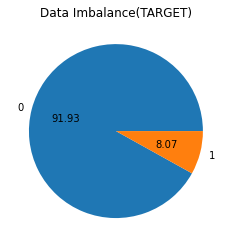

In [27]:
plt.pie(final_data.TARGET.value_counts(), autopct = "%.2f", labels = final_data.TARGET.value_counts().keys().tolist())
plt.title("Data Imbalance(TARGET)")
plt.show()

### Dealing with Outliers/ Univariate Analysis

In [28]:
final_data.CNT_CHILDREN.describe()

count    307216.000000
mean          0.416974
std           0.722045
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [29]:
#function for outliers
def find_Outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    Outliers = col[(col<(Q1-1.5*IQR))|(col>(Q3+1.5*IQR))]
    return Outliers

In [30]:
Out1 = find_Outliers(final_data.CNT_CHILDREN)
len(Out1)

4264

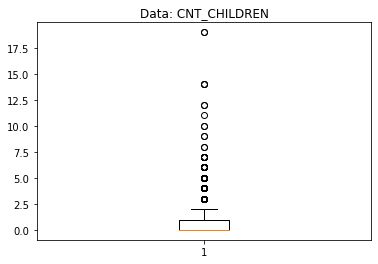

In [31]:
plt.boxplot(final_data.CNT_CHILDREN)
plt.title("Data: CNT_CHILDREN")
plt.show()

In [32]:
final_data["Age"] = final_data.DAYS_BIRTH*(-1)/365

In [33]:
(((final_data.DAYS_BIRTH)*(-1))/365).describe()

count    307216.000000
mean         43.942037
std          11.955706
min          20.517808
25%          34.013699
50%          43.158904
75%          53.928767
max          69.120548
Name: DAYS_BIRTH, dtype: float64

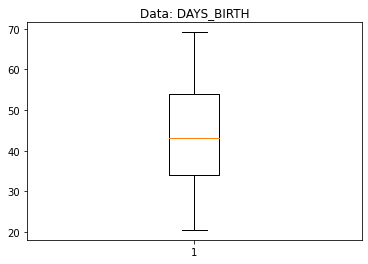

In [34]:
plt.boxplot(final_data.Age)
plt.title("Data: DAYS_BIRTH")
plt.show()

In [35]:
#
b = final_data.DAYS_EMPLOYED/365
c = b[b>0]
c

8         1000.665753
11        1000.665753
23        1000.665753
38        1000.665753
43        1000.665753
             ...     
307469    1000.665753
307483    1000.665753
307487    1000.665753
307505    1000.665753
307507    1000.665753
Name: DAYS_EMPLOYED, Length: 55352, dtype: float64

In [36]:
55352/307220*100

18.0170561812382

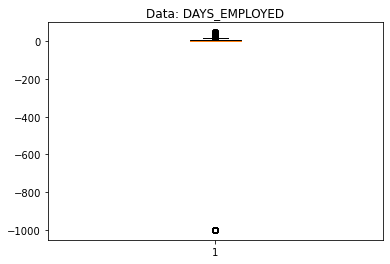

In [37]:
plt.boxplot((((final_data.DAYS_EMPLOYED)*(-1))/365))
plt.title("Data: DAYS_EMPLOYED")
plt.show()

In [38]:
Out2 = find_Outliers(final_data.DAYS_EMPLOYED)
len(Out2)

72182

In [39]:
final_data.drop(final_data.loc[final_data["DAYS_EMPLOYED"] == 365243].index, axis = 0, inplace = True)
final_data.shape

(251864, 32)

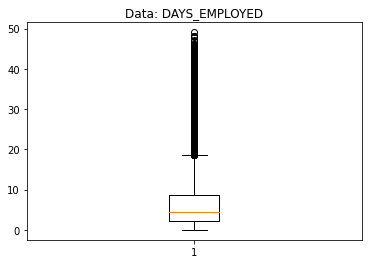

In [40]:
plt.boxplot((((final_data.DAYS_EMPLOYED)*(-1))/365))
plt.title("Data: DAYS_EMPLOYED")
plt.show()

In [41]:
final_data.DAYS_REGISTRATION.describe()

count    251864.000000
mean      -4635.419711
std        3252.277170
min      -22928.000000
25%       -6952.000000
50%       -4265.000000
75%       -1845.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

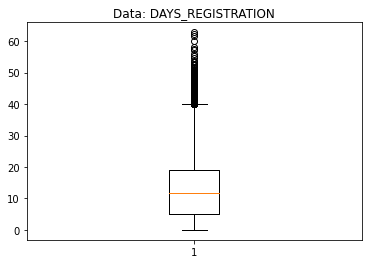

In [42]:
plt.boxplot((((final_data.DAYS_REGISTRATION)*(-1))/365))
plt.title("Data: DAYS_REGISTRATION")
plt.show()

In [43]:
final_data.DAYS_ID_PUBLISH.describe()

count    251864.000000
mean      -2800.711964
std        1515.312074
min       -7197.000000
25%       -4177.000000
50%       -2887.000000
75%       -1487.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

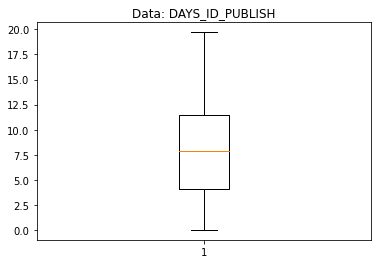

In [44]:
plt.boxplot((((final_data.DAYS_ID_PUBLISH)*(-1))/365))
plt.title("Data: DAYS_ID_PUBLISH")
plt.show()

In [45]:
((final_data.DAYS_LAST_PHONE_CHANGE)*(-1)/365).describe()

count    251864.000000
mean          2.660549
std           2.266963
min          -0.000000
25%           0.789041
50%           2.090411
75%           4.323288
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

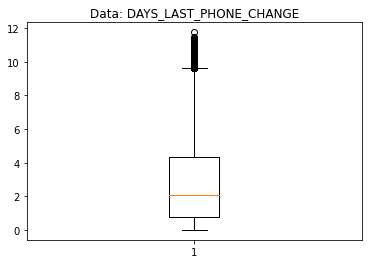

In [46]:
plt.boxplot((((final_data.DAYS_LAST_PHONE_CHANGE)*(-1))/365))
plt.title("Data: DAYS_LAST_PHONE_CHANGE")
plt.show()

In [47]:
final_data.AMT_INCOME_TOTAL.describe()

count    2.518640e+05
mean     1.759579e+05
std      2.589747e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [48]:
final_data.AMT_INCOME_TOTAL.value_counts

<bound method IndexOpsMixin.value_counts of 0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307504    153000.0
307506    157500.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 251864, dtype: float64>

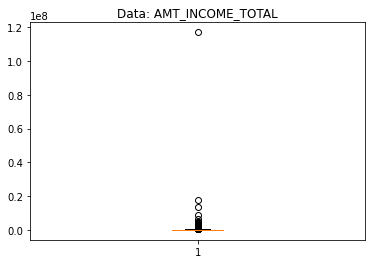

In [49]:
plt.boxplot(final_data.AMT_INCOME_TOTAL)
plt.title("Data: AMT_INCOME_TOTAL")
plt.show()

In [50]:
final_data.AMT_CREDIT.describe()

count    2.518640e+05
mean     6.117394e+05
std      4.065560e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.302140e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [51]:
final_data.AMT_CREDIT.value_counts

<bound method IndexOpsMixin.value_counts of 0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307504     331920.0
307506     254700.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 251864, dtype: float64>

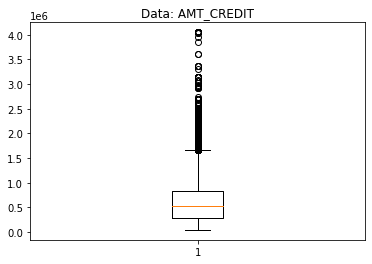

In [52]:
plt.boxplot(final_data.AMT_CREDIT)
plt.title("Data: AMT_CREDIT")
plt.show()

In [53]:
final_data.AMT_ANNUITY.describe()

count    251864.000000
mean      27826.356970
std       14645.512871
min        1980.000000
25%       17089.875000
50%       25843.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [54]:
final_data.AMT_ANNUITY.value_counts

<bound method IndexOpsMixin.value_counts of 0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307504    16096.5
307506    27558.0
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 251864, dtype: float64>

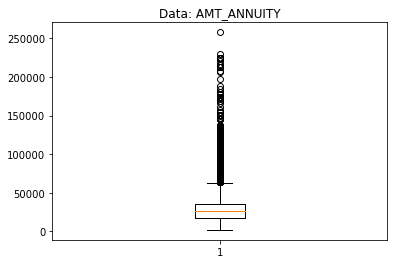

In [55]:
plt.boxplot(final_data.AMT_ANNUITY)
plt.title("Data: AMT_ANNUITY")
plt.show()

In [56]:
final_data.AMT_GOODS_PRICE.describe()

count    2.518640e+05
mean     5.494108e+05
std      3.732722e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [57]:
final_data.AMT_GOODS_PRICE.value_counts

<bound method IndexOpsMixin.value_counts of 0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307504     225000.0
307506     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 251864, dtype: float64>

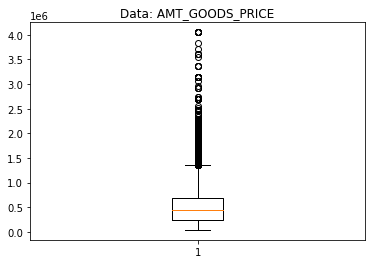

In [58]:
plt.boxplot(final_data.AMT_GOODS_PRICE)
plt.title("Data: AMT_GOODS_PRICE")
plt.show()

In [59]:
final_data.CNT_FAM_MEMBERS.describe()

count    251864.000000
mean          2.252541
std           0.942073
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [60]:
final_data.CNT_FAM_MEMBERS.value_counts

<bound method IndexOpsMixin.value_counts of 0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307504    1.0
307506    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 251864, dtype: float64>

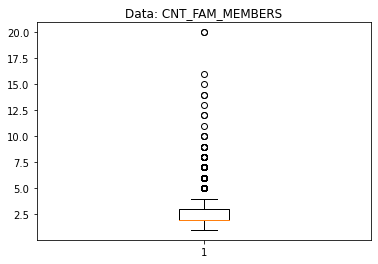

In [61]:
plt.boxplot(final_data.CNT_FAM_MEMBERS)
plt.title("Data: CNT_FAM_MEMBERS")
plt.show()

In [62]:
final_data.REGION_POPULATION_RELATIVE.value_counts()

0.035792    13724
0.046220    11864
0.030755     9578
0.025164     9556
0.026392     9444
            ...  
0.001417      397
0.001333      206
0.000533       24
0.000938       21
0.000290        1
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

### Univariate analysis for Categorical Columns

In [63]:
final_data["NAME_CONTRACT_TYPE"]= final_data["NAME_CONTRACT_TYPE"].astype(pd.StringDtype())

In [64]:
final_data["NAME_CONTRACT_TYPE"].dtype

string[python]

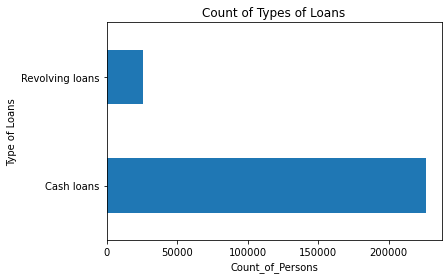

In [65]:
final_data.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.xlabel("Count_of_Persons")
plt.ylabel("Type of Loans")
plt.title("Count of Types of Loans")
plt.show()

In [66]:
final_data.CODE_GENDER.value_counts()

F    156998
M     94866
Name: CODE_GENDER, dtype: Int64

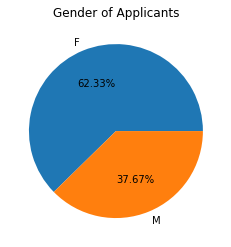

In [67]:
Value = ['F', 'M']
plt.pie(final_data.CODE_GENDER.value_counts(), labels = Value,autopct='%1.2f%%')
plt.title("Gender of Applicants")
plt.show()  


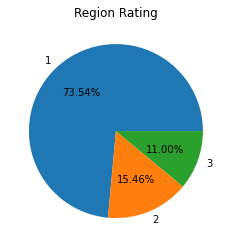

In [68]:
Value = ['1', '2','3']
plt.pie(final_data.REGION_RATING_CLIENT.value_counts(), labels = Value,autopct='%1.2f%%')
plt.title("Region Rating")
plt.show() 

In [69]:
final_data.FLAG_OWN_CAR.value_counts()

N    157452
Y     94412
Name: FLAG_OWN_CAR, dtype: int64

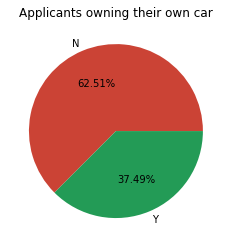

In [70]:
Value = ['N', 'Y']
plt.pie(final_data.FLAG_OWN_CAR.value_counts(), labels = Value,autopct='%1.2f%%', colors = ['#CB4335','#239B56'])
plt.title("Applicants owning their own car")
plt.show()              

In [71]:
final_data.FLAG_OWN_REALTY.value_counts()

Y    170871
N     80993
Name: FLAG_OWN_REALTY, dtype: int64

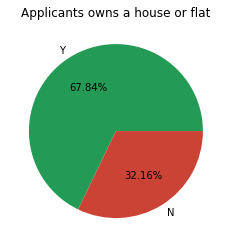

In [72]:
Value = ['Y', 'N']

plt.pie(final_data.FLAG_OWN_REALTY.value_counts(), labels = Value,autopct='%1.2f%%', colors = ['#239B56','#CB4335'])
plt.title("Applicants owns a house or flat")
plt.show()  

In [73]:
final_data.NAME_INCOME_TYPE.value_counts()

Working                 158579
Commercial associate     71566
State servant            21677
Student                     18
Businessman                 10
Pensioner                    9
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

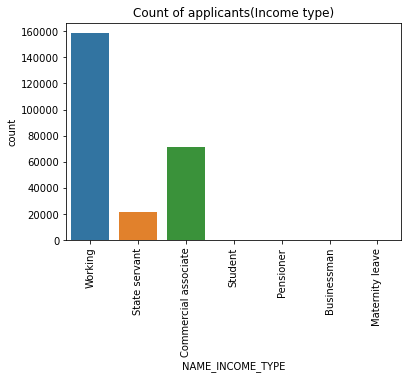

In [74]:
ax = sns.countplot(x="NAME_INCOME_TYPE", data = final_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Count of applicants(Income type)")
plt.show()


In [75]:
final_data.NAME_EDUCATION_TYPE.value_counts()         

Secondary / secondary special    173098
Higher education                  66601
Incomplete higher                  9744
Lower secondary                    2283
Academic degree                     138
Name: NAME_EDUCATION_TYPE, dtype: int64

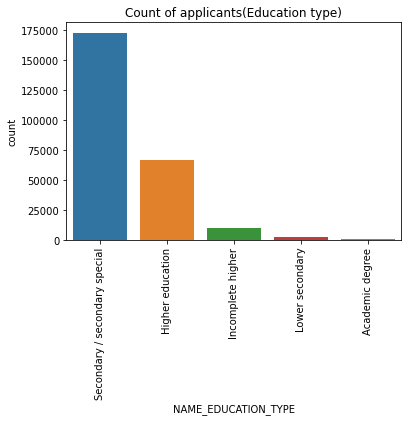

In [76]:
ax = sns.countplot(x="NAME_EDUCATION_TYPE", data = final_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Count of applicants(Education type)")
plt.show()

In [77]:
final_data.NAME_FAMILY_STATUS.value_counts()           

Married                 163749
Single / not married     39257
Civil marriage           26171
Separated                15989
Widow                     6698
Name: NAME_FAMILY_STATUS, dtype: int64

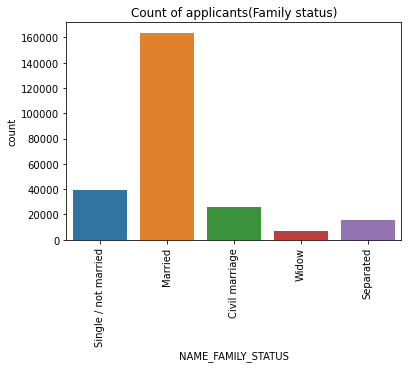

In [78]:
ax = sns.countplot(x="NAME_FAMILY_STATUS", data = final_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Count of applicants(Family status)")
plt.show()

In [79]:
final_data.NAME_HOUSING_TYPE.value_counts()           

House / apartment      220254
With parents            14603
Municipal apartment      9033
Rented apartment         4670
Office apartment         2300
Co-op apartment          1004
Name: NAME_HOUSING_TYPE, dtype: int64

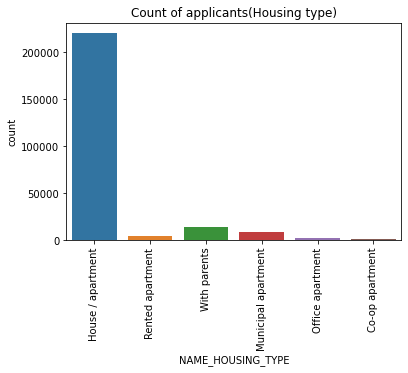

In [80]:
ax = sns.countplot(x="NAME_HOUSING_TYPE", data = final_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Count of applicants(Housing type)")
plt.show()

In [81]:
final_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67930
Self-employed             38357
Other                     16667
Medicine                  11180
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6871
Construction               6714
Business Entity Type 1     5980
Transport: type 4          5392
Trade: type 3              3488
Industry: type 9           3367
Industry: type 3           3275
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transport: type 3          1185
Industry

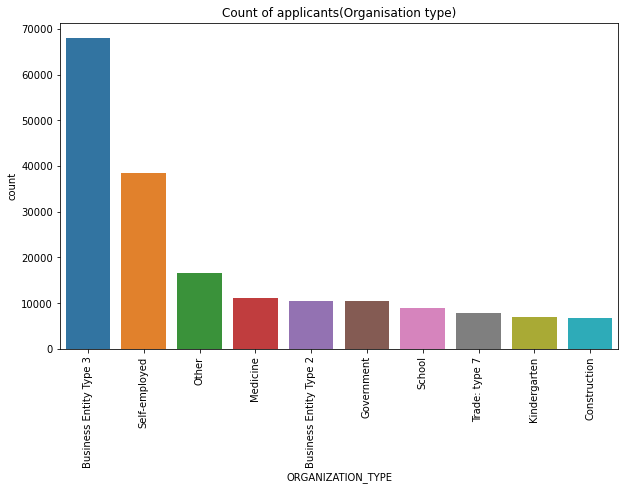

In [82]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="ORGANIZATION_TYPE", data = final_data, order = final_data['ORGANIZATION_TYPE'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Count of applicants(Organisation type)")
plt.show()

### Bivariate Analysis

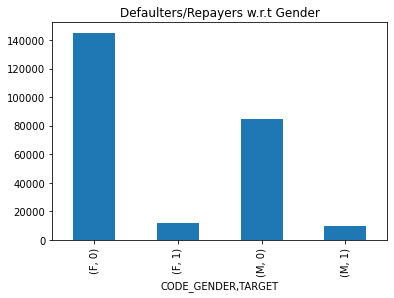

In [83]:
final_data.groupby(["CODE_GENDER","TARGET"])["TARGET"].count().plot.bar()
plt.title("Defaulters/Repayers w.r.t Gender")
plt.show()

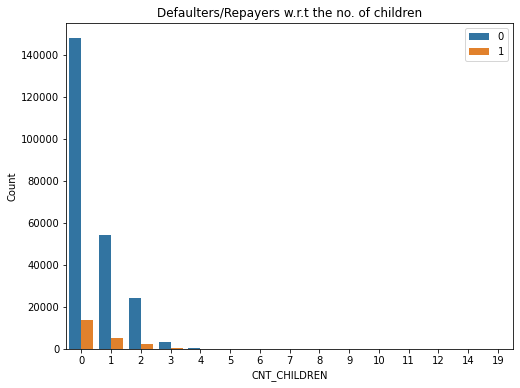

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(x="CNT_CHILDREN",y="Count",hue = 'TARGET',data = final_data, estimator = np.sum)
plt.title("Defaulters/Repayers w.r.t the no. of children")
plt.legend(loc='upper right')
plt.show()

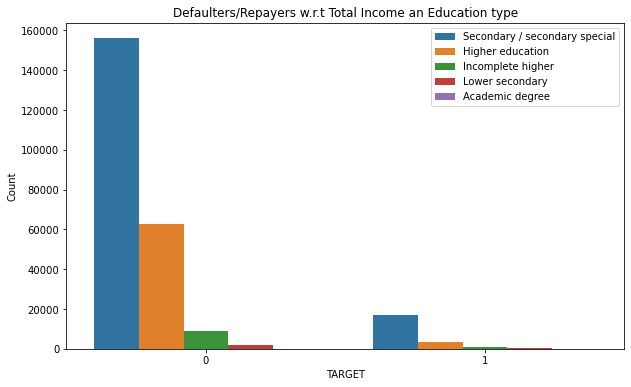

In [85]:
#plot the stacked bar plot of Target and Count with Education type
plt.figure(figsize=(10,6))
sns.barplot(x="TARGET",y="Count",hue="NAME_EDUCATION_TYPE",data = final_data, estimator = np.sum)
plt.legend(loc='upper right')
plt.title("Defaulters/Repayers w.r.t Total Income an Education type")
plt.show()

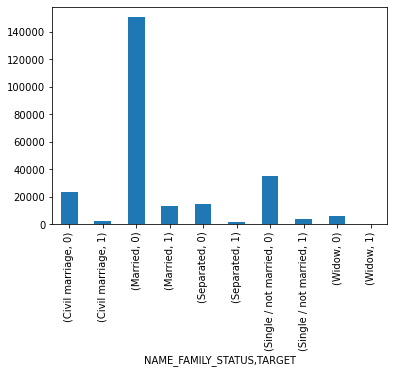

In [86]:
final_data.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].count().plot.bar()
plt.title("")
plt.show()

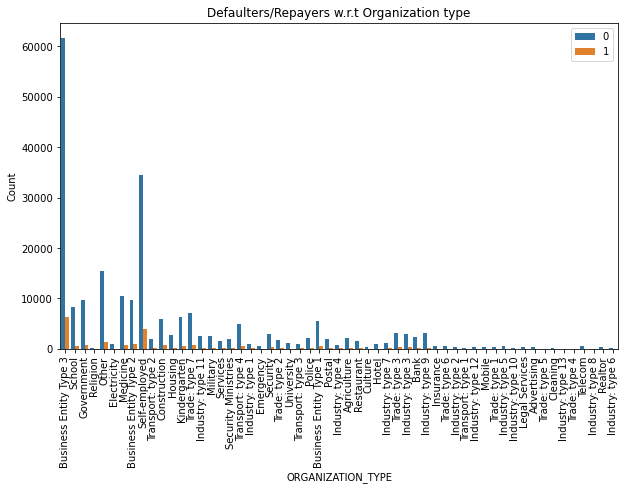

In [87]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="ORGANIZATION_TYPE",y="Count",hue="TARGET",data = final_data, estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.legend(loc='upper right')
plt.title("Defaulters/Repayers w.r.t Organization type")
plt.show()

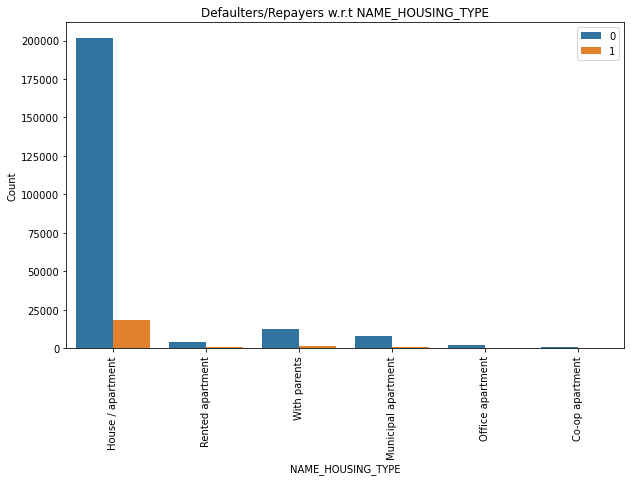

In [88]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="NAME_HOUSING_TYPE",y="Count",hue="TARGET",data = final_data, estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.legend(loc='upper right')
plt.title("Defaulters/Repayers w.r.t NAME_HOUSING_TYPE")
plt.show()            

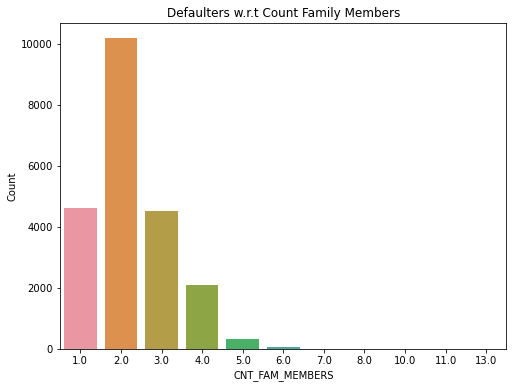

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x="CNT_FAM_MEMBERS",y="Count",data = final_data[final_data.TARGET == 1], estimator = np.sum)
plt.title("Defaulters w.r.t Count Family Members")
plt.show()

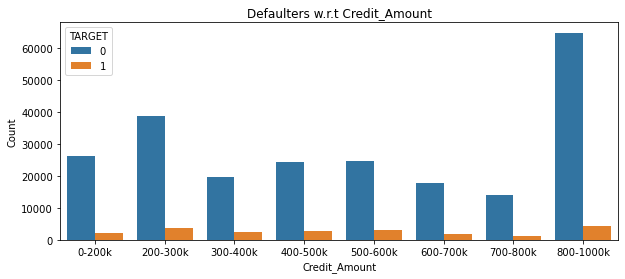

In [90]:
final_data['Credit_Amount'] = pd.cut(x=final_data['AMT_CREDIT'], bins=[0, 200000,300000,400000,500000,600000,700000,800000,100000000], labels=['0-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-1000k'])
plt.figure(figsize=(10, 4))
sns.barplot(x="Credit_Amount",y="Count",hue= 'TARGET',data = final_data, estimator = np.sum)
plt.title("Defaulters w.r.t Credit_Amount")
plt.show()

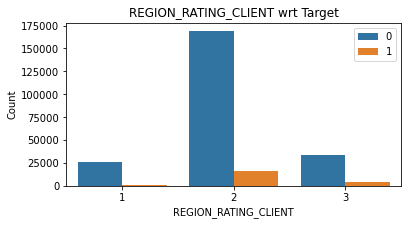

In [91]:
plt.figure(figsize=(6, 3))
sns.barplot(x="REGION_RATING_CLIENT",y="Count",hue = 'TARGET',data = final_data, estimator = np.sum)
plt.legend(loc = 'upper right')
plt.title("REGION_RATING_CLIENT wrt Target")
plt.show()

In [92]:
final_data.Age.value_counts

<bound method IndexOpsMixin.value_counts of 0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307504    45.767123
307506    25.553425
307508    41.002740
307509    32.769863
307510    46.180822
Name: Age, Length: 251864, dtype: float64>

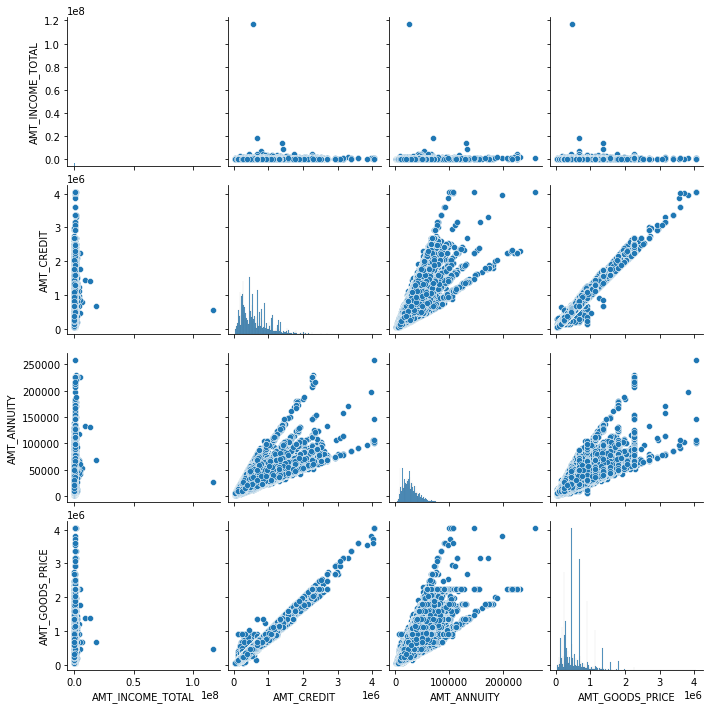

In [93]:
df = final_data[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
sns.pairplot(df,palette="husl")
plt.show()

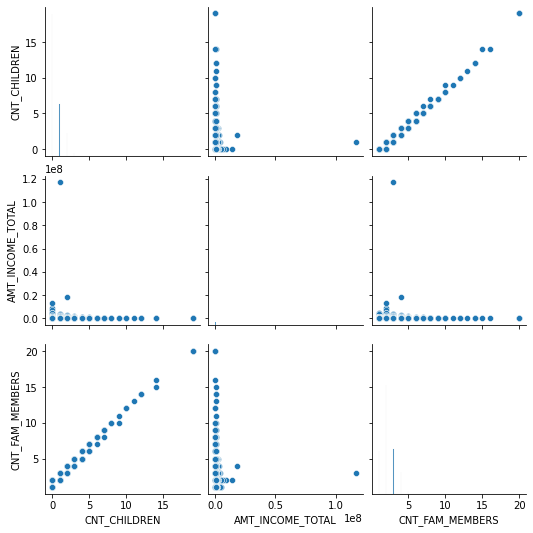

In [94]:
df1 = final_data[['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']]
sns.pairplot(df1)
plt.show()

<AxesSubplot:>

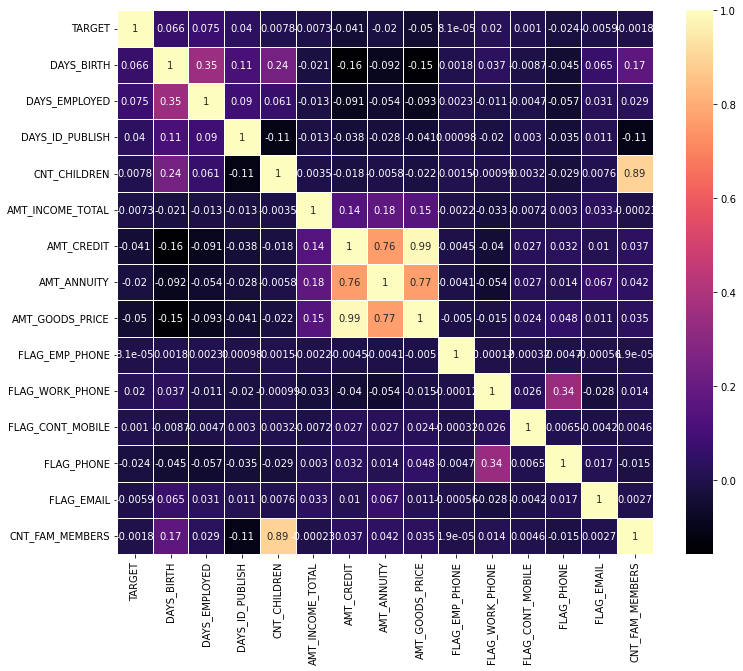

In [95]:
fig = plt.figure(figsize=(12,10))
df2 = final_data[['TARGET','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS']]
sns.heatmap(df2.corr(), cmap='magma', linewidth = 1, annot = True)

## Analysing Previous_application.csv

In [96]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [97]:
p_data.shape

(1670214, 37)

In [98]:
z = (p_data.isnull().sum()/p_data.shape[0])*100
z[z > 20]

AMT_ANNUITY                  22.286665
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [99]:
Cols_to_drop1 = z[z > 20].to_frame().index.tolist()
Cols_to_drop1

['AMT_ANNUITY',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [100]:
p_data.drop(Cols_to_drop1, axis = 1, inplace = True)
p_data.shape

(1670214, 23)

In [101]:
p_data.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [102]:
p_data.dropna(inplace = True)
p_data.shape

(1669867, 23)

In [103]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1669867 non-null  int64  
 1   SK_ID_CURR                   1669867 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669867 non-null  object 
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 6   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1669867 non-null  object 
 10  NAME_CONTRACT_STATUS         1669867 non-null  object 
 11  DAYS_DECISION                1669867 non-null  int64  
 12  NAME_PAYMENT_TYPE            1669867 non-n

### Univariate Analysis

In [104]:
#Univariate Analysis of NAME_CONTRACT_TYPE
p_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193163
Name: NAME_CONTRACT_TYPE, dtype: int64

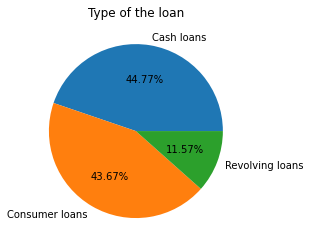

In [105]:
Value = ['Cash loans', 'Consumer loans','Revolving loans']
plt.pie(p_data.NAME_CONTRACT_TYPE.value_counts(), labels = Value,autopct='%1.2f%%')
plt.title("Type of the loan")
plt.show() 

In [106]:
#Univariate Analysis of AMT_APPLICATION    
p_data.AMT_APPLICATION.value_counts()

0.00         392055
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: AMT_APPLICATION, Length: 93885, dtype: int64

In [107]:
p_data.AMT_APPLICATION.describe()

count    1.669867e+06
mean     1.752703e+05
std      2.927993e+05
min      0.000000e+00
25%      1.879650e+04
50%      7.105500e+04
75%      1.804410e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

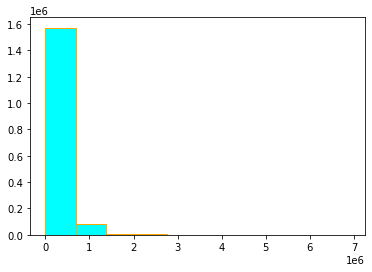

In [108]:
plt.hist(p_data.AMT_APPLICATION,bins = 10,edgecolor='Orange',color='cyan')
plt.show()

In [109]:
p_data.AMT_CREDIT.value_counts()

0.00         336422
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

In [110]:
p_data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922314
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

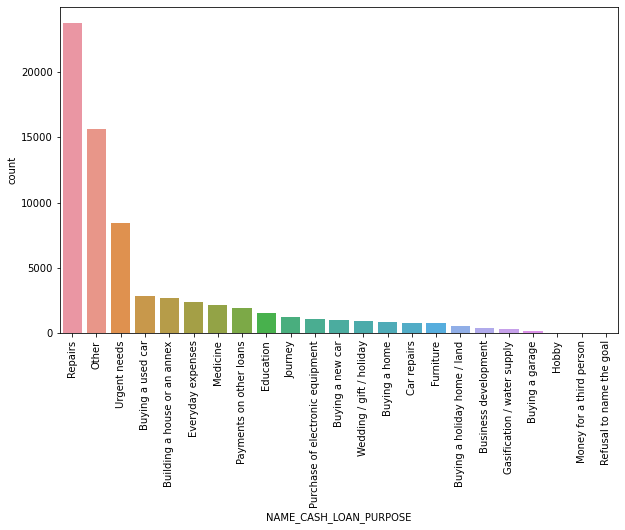

In [111]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="NAME_CASH_LOAN_PURPOSE", data = p_data, order = p_data['NAME_CASH_LOAN_PURPOSE'].value_counts().iloc[2:].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [112]:
p_data.NAME_CONTRACT_STATUS.value_counts()

Approved        1036780
Canceled         316004
Refused          290647
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

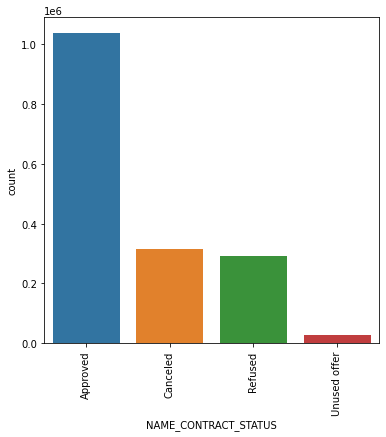

In [113]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="NAME_CONTRACT_STATUS", data = p_data, order = p_data['NAME_CONTRACT_STATUS'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [114]:
p_data.DAYS_DECISION.value_counts()

-245     2444
-238     2390
-210     2375
-273     2349
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [115]:
p_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627037
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

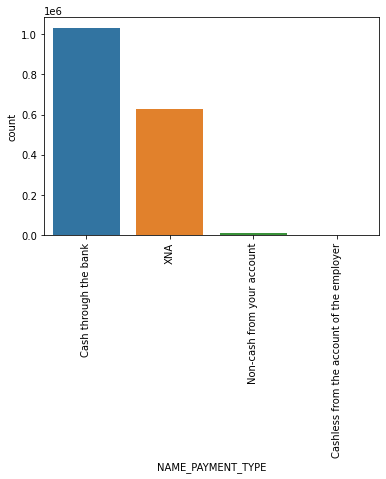

In [116]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="NAME_PAYMENT_TYPE", data = p_data, order = p_data['NAME_PAYMENT_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [117]:
p_data.CODE_REJECT_REASON.value_counts()

XAP       1352777
HC         175202
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5242
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

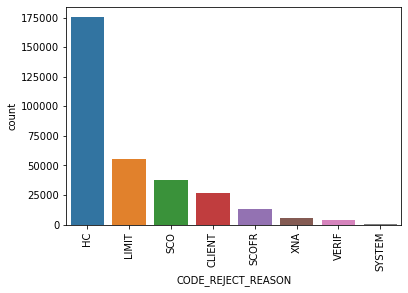

In [118]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="CODE_REJECT_REASON", data = p_data, order = p_data['CODE_REJECT_REASON'].value_counts().iloc[1:].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [119]:
p_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1230959
New           301342
Refreshed     135625
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

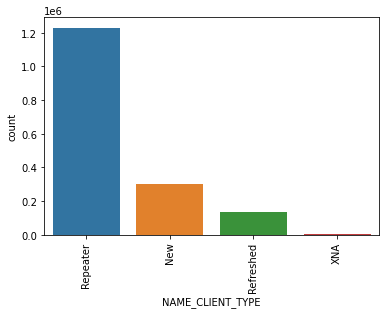

In [120]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="NAME_CLIENT_TYPE", data = p_data, order = p_data['NAME_CLIENT_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [121]:
p_data.NAME_GOODS_CATEGORY.value_counts()

XNA                         950462
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

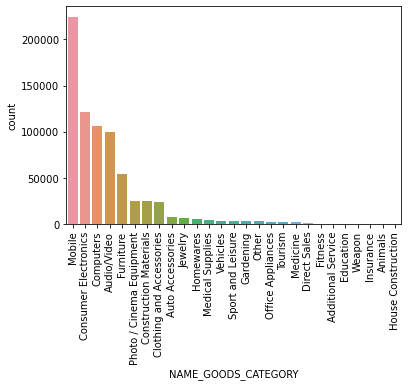

In [122]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="NAME_GOODS_CATEGORY", data = p_data, order = p_data['NAME_GOODS_CATEGORY'].value_counts().iloc[1:].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [123]:
p_data.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      371884
Cards    144984
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

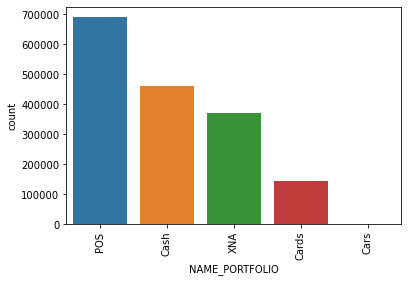

In [124]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="NAME_PORTFOLIO", data = p_data, order = p_data['NAME_PORTFOLIO'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [125]:
p_data.NAME_PRODUCT_TYPE.value_counts()

XNA        1063320
x-sell      456287
walk-in     150260
Name: NAME_PRODUCT_TYPE, dtype: int64

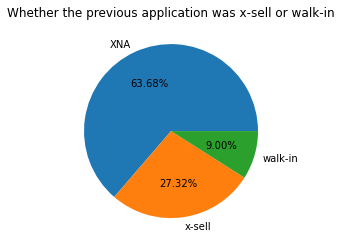

In [126]:
Value = ['XNA', 'x-sell','walk-in']
plt.pie(p_data.NAME_PRODUCT_TYPE.value_counts(), labels = Value,autopct='%1.2f%%')
plt.title("Whether the previous application was x-sell or walk-in")
plt.show() 

In [127]:
p_data.CHANNEL_TYPE.value_counts()

Credit and cash offices       719965
Country-wide                  494347
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57045
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

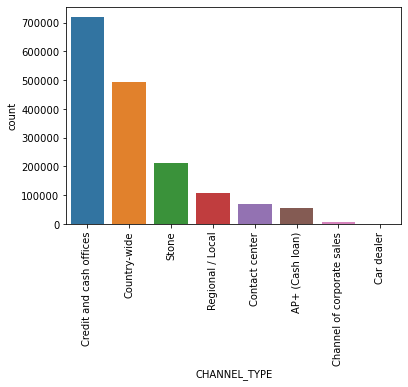

In [128]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="CHANNEL_TYPE", data = p_data, order = p_data['CHANNEL_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [129]:
p_data.SELLERPLACE_AREA.value_counts()

-1       762672
 0        60523
 50       37362
 30       34377
 20       33796
          ...  
 1014         1
 1256         1
 677          1
 7518         1
 1446         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

In [130]:
p_data.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855716
Consumer electronics    398265
Connectivity            275686
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

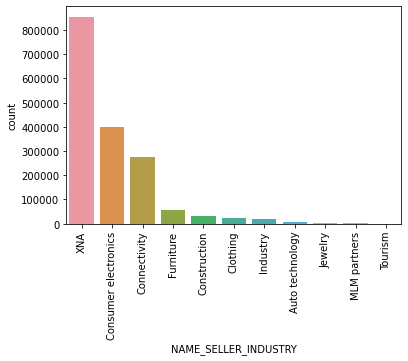

In [131]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="NAME_SELLER_INDUSTRY", data = p_data, order = p_data['NAME_SELLER_INDUSTRY'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [132]:
p_data.NAME_YIELD_GROUP.value_counts()

XNA           516868
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

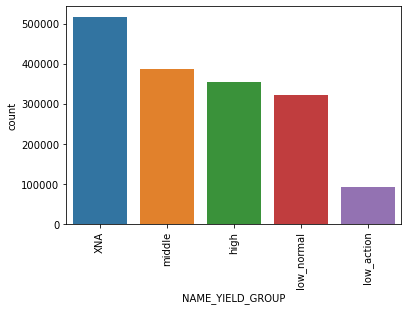

In [133]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="NAME_YIELD_GROUP", data = p_data, order = p_data['NAME_YIELD_GROUP'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [134]:
p_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112581
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

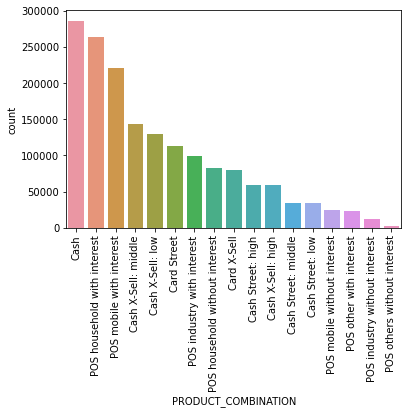

In [135]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="PRODUCT_COMBINATION", data = p_data, order = p_data['PRODUCT_COMBINATION'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Bivariate or Multivariate Analysis

In [136]:
df3 = p_data[['AMT_APPLICATION','AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']]


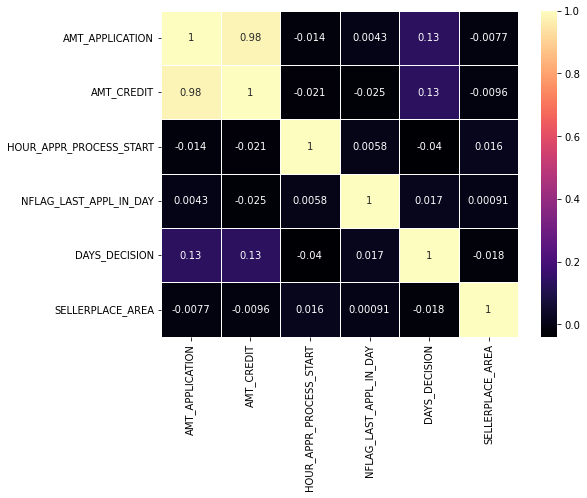

In [137]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df3.corr(), cmap='magma', linewidth = 1,annot = True)
plt.show()

## Analysing after merging

In [138]:
final_data.shape

(251864, 33)

In [139]:
p_data.shape

(1669867, 23)

In [140]:
data_merge = pd.merge(final_data, p_data, on='SK_ID_CURR', how='inner')
data_merge.shape

(1138593, 55)

In [141]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138593 entries, 0 to 1138592
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1138593 non-null  int64   
 1   TARGET                       1138593 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1138593 non-null  string  
 3   CODE_GENDER                  1138593 non-null  string  
 4   FLAG_OWN_CAR                 1138593 non-null  object  
 5   FLAG_OWN_REALTY              1138593 non-null  object  
 6   CNT_CHILDREN                 1138593 non-null  int64   
 7   AMT_INCOME_TOTAL             1138593 non-null  float64 
 8   AMT_CREDIT_x                 1138593 non-null  float64 
 9   AMT_ANNUITY                  1138593 non-null  float64 
 10  AMT_GOODS_PRICE              1138593 non-null  float64 
 11  NAME_INCOME_TYPE             1138593 non-null  object  
 12  NAME_EDUCATION_TYPE         

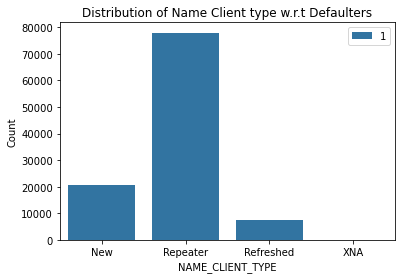

In [142]:
plt.figure(figsize=(6,4))
sns.barplot(x="NAME_CLIENT_TYPE",y="Count",hue="TARGET",data = data_merge[data_merge.TARGET == 1], estimator = np.sum)
plt.legend(loc='upper right')
plt.title("Distribution of Name Client type w.r.t Defaulters")
plt.show()

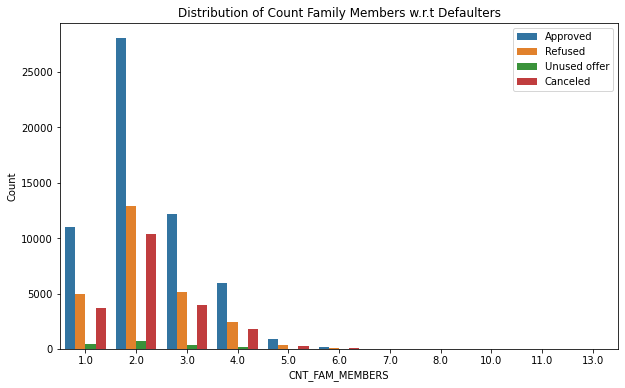

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x="CNT_FAM_MEMBERS",y="Count",hue ='NAME_CONTRACT_STATUS',data = data_merge[data_merge.TARGET == 1], estimator = np.sum)
plt.title("Distribution of Count Family Members w.r.t Defaulters")
plt.legend(loc='upper right')
plt.show()

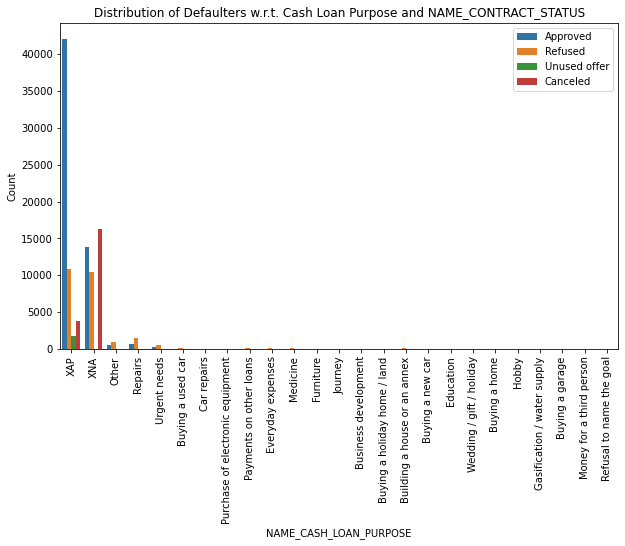

In [145]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="NAME_CASH_LOAN_PURPOSE",y="Count",hue ='NAME_CONTRACT_STATUS',data = data_merge[data_merge.TARGET == 1], estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Distribution of Defaulters w.r.t. Cash Loan Purpose and NAME_CONTRACT_STATUS")
plt.legend(loc='upper right')
plt.show()